In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import tensorflow as tf

### **Load the MNIST Dataset**

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [4]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
x_test.shape

(10000, 28, 28, 1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

### **Add Noise to Dataset**

In [7]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [8]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [9]:
x_train_noisy.shape

(60000, 28, 28, 1)

### **Visualize the Dataset**

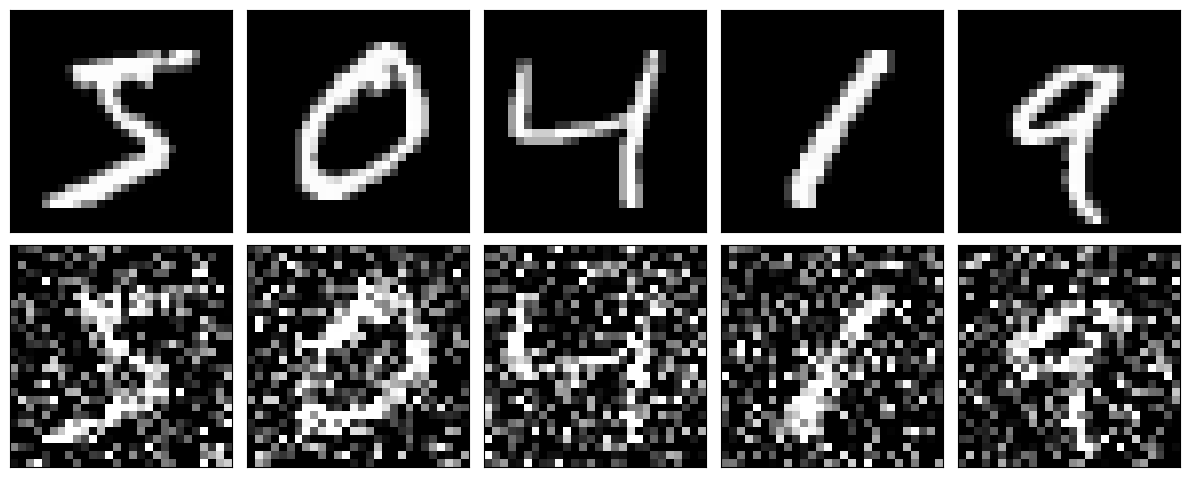

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i in range(5):
  axes[0][i].imshow(x_train[i], cmap='gray')
  axes[0][i].set_xticks([])
  axes[0][i].set_yticks([])
  axes[0][i].set_label('Original')
  axes[1][i].imshow(x_train_noisy[i], cmap='gray')
  axes[1][i].set_xticks([])
  axes[1][i].set_yticks([])
  axes[1][i].set_label('Noisy')

plt.tight_layout()
plt.show()

### **Design the Convolutional Autoencoder**

In [11]:
input_shape = (28, 28, 1)

In [12]:
autoencoder = models.Sequential([
    layers.Input(input_shape),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPool2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

In [13]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

### **Train the Autoencoder**

In [15]:
autoencoder.fit(
    x_train_noisy, x_train, epochs=20, batch_size=128, validation_data=(x_test_noisy, x_test)
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.7961 - loss: 0.2322 - val_accuracy: 0.8113 - val_loss: 0.1141
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8112 - loss: 0.1121 - val_accuracy: 0.8115 - val_loss: 0.1059
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8118 - loss: 0.1061 - val_accuracy: 0.8117 - val_loss: 0.1022
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8124 - loss: 0.1027 - val_accuracy: 0.8113 - val_loss: 0.1008
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8130 - loss: 0.1009 - val_accuracy: 0.8124 - val_loss: 0.0991
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8124 - loss: 0.0999 - val_accuracy: 0.8124 - val_loss: 0.0981
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8130 - loss: 0.0987 - val_accuracy: 0.8122 - val_loss: 0.0973
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8132 - loss: 0.0978 - val_accuracy: 

### **Evaluate and Visualize the Result**

In [16]:
denoised_images = autoencoder.predict(x_test_noisy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [17]:
denoised_images.shape

(10000, 28, 28, 1)

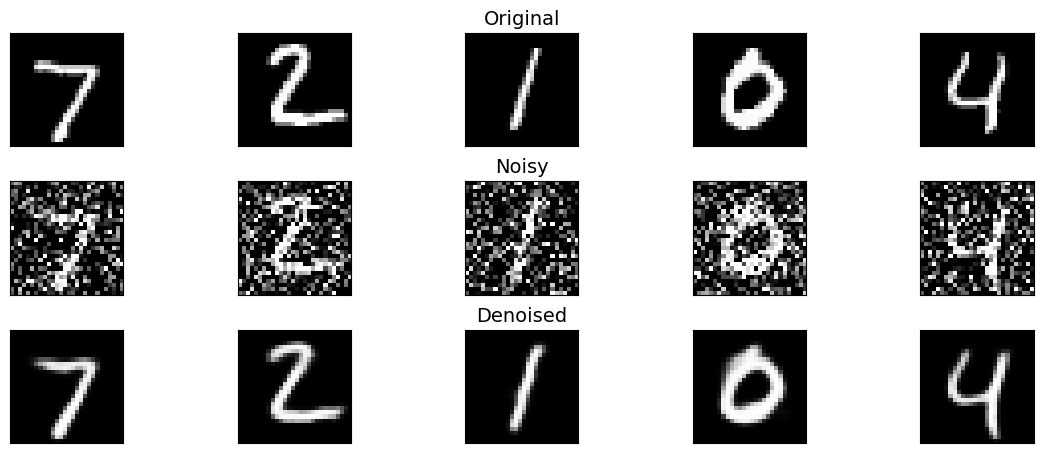

In [25]:
fig, axes = plt.subplots(3, 5, figsize=(12, 5))
for i in range(5):
    axes[0][i].imshow(x_test[i], cmap='gray')
    axes[0][i].set_xticks([])
    axes[0][i].set_yticks([])
    axes[1][i].imshow(x_test_noisy[i], cmap='gray')
    axes[1][i].set_xticks([])
    axes[1][i].set_yticks([])
    axes[2][i].imshow(denoised_images[i], cmap='gray')
    axes[2][i].set_xticks([])
    axes[2][i].set_yticks([])

axes[0][2].set_title('Original', fontsize=14, loc='center')
axes[1][2].set_title('Noisy', fontsize=14, loc='center')
axes[2][2].set_title('Denoised', fontsize=14, loc='center')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()